>> ## In this notebook we will be doing EDA. We will also apply multiple classification model for better prediction.

## Importing Libraries ||

In [1]:
# Importing the  required libraries

import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import missingno as msno
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%config Completer.use_jedi = False

                    #---------------------------------------------------------------------------------------------------------------#

# Importing Machine Learnig Libraries

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier


## Reading Data ||

In [2]:
# Reading Data

train_data = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")
submission = pd.read_csv("/kaggle/input/spaceship-titanic/sample_submission.csv")

In [3]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
train_data.shape

(8693, 14)

In [5]:
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [6]:
test_data.shape

(4277, 13)

In [7]:
submission.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [8]:
submission.shape

(4277, 2)

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [10]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0


In [11]:
# creating a function to get unique values of each column.

for col in train_data.columns:
    unique_values = pd.unique(train_data[col])
    print(f"{col}:{unique_values}")

PassengerId:['0001_01' '0002_01' '0003_01' ... '9279_01' '9280_01' '9280_02']
HomePlanet:['Europa' 'Earth' 'Mars' nan]
CryoSleep:[False True nan]
Cabin:['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']
Destination:['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
Age:[39. 24. 58. 33. 16. 44. 26. 28. 35. 14. 34. 45. 32. 48. 31. 27.  0.  1.
 49. 29. 10.  7. 21. 62. 15. 43. 47.  2. 20. 23. 30. 17. 55.  4. 19. 56.
 nan 25. 38. 36. 22. 18. 42. 37. 13.  8. 40.  3. 54.  9.  6. 64. 67. 61.
 50. 41. 57. 11. 52. 51. 46. 60. 63. 59.  5. 79. 68. 74. 12. 53. 65. 71.
 75. 70. 76. 78. 73. 66. 69. 72. 77.]
VIP:[False True nan]
RoomService:[   0.  109.   43. ... 1569. 8586.  745.]
FoodCourt:[   0.    9. 3576. ... 3208. 6819. 4688.]
ShoppingMall:[   0.   25.  371. ... 1085.  510. 1872.]
Spa:[   0.  549. 6715. ... 2868. 1107. 1643.]
VRDeck:[   0.   44.   49. ... 1164.  971. 3235.]
Name:['Maham Ofracculy' 'Juanna Vines' 'Altark Susent' ... 'Fayey Connon'
 'Celeon Hontichre' 'Propsh Hontichre']

## Performing EDA ||

<AxesSubplot:>

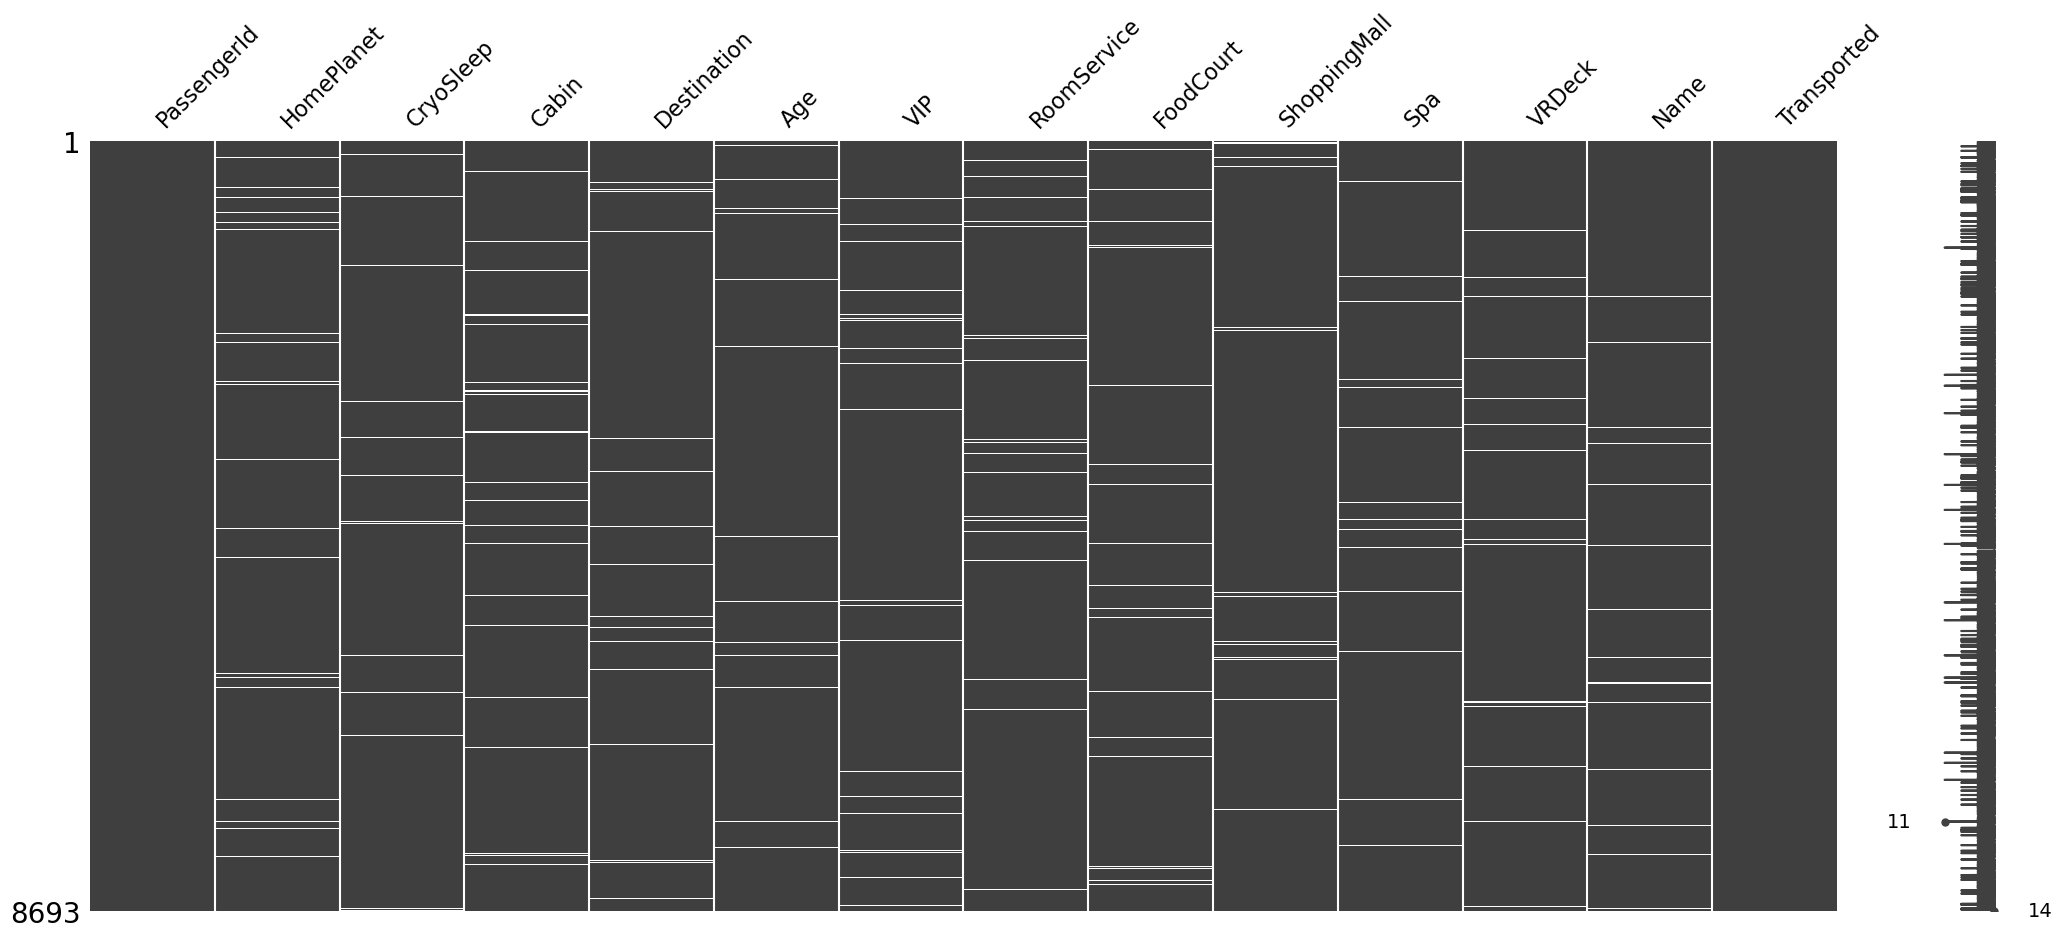

In [12]:
# Checking for missing_values

msno.matrix(train_data)

>> ### There are missing values in all column except 'passengerId' and 'Transported' column

In [13]:
# Drawing pie chart

px.pie(train_data, names='HomePlanet', title = "planet of Passengers")

>> ###  more no. of passengers are from Planet "Earth"

>> 

In [14]:
# Drawing pie chart 

px.pie(train_data, names='Transported', title = "Planet of Passengers")

>> ### There are approx equally proportion of people who are transported vs. not transported 

In [15]:
avg_age = train_data.groupby("HomePlanet")["Age"].median()
avg_age

HomePlanet
Earth     23.0
Europa    33.0
Mars      28.0
Name: Age, dtype: float64

In [16]:
# plotting histogram

px.histogram(train_data, x = "Age", color="HomePlanet", marginal="box")

>> ### age distribution of each planet and will use it to fill missing values in 'Age' column.

In [17]:
# Plotting histogram

px.histogram(train_data, color = "Transported", x="HomePlanet")

>> ### maximum no. of people transported through planet 'Europa' in terms of total people of its planet.

In [18]:
# Plotting bar chart

fig = go.Figure(data=[
    go.Bar(name="Earth",x=train_data[train_data['HomePlanet']=='Earth']['Transported'].value_counts().index, y=train_data[train_data['HomePlanet']=='Earth']['Transported'].value_counts()),
    go.Bar(name="Mars",x=train_data[train_data['HomePlanet']=='Mars']['Transported'].value_counts().index, y=train_data[train_data['HomePlanet']=='Mars']['Transported'].value_counts()),
     go.Bar(name="Europa",x=train_data[train_data['HomePlanet']=='Europa']['Transported'].value_counts().index, y=train_data[train_data['HomePlanet']=='Europa']['Transported'].value_counts()),
])

fig.update_layout(barmode='group')
fig.show()

>> ### maximum no. of people transported from planet 'Earth' among all planets.

In [19]:
# showing correlation

px.imshow(train_data.corr(), text_auto=True, aspect="auto")

In [20]:
# Plotting histogram

px.histogram(train_data, x=train_data[train_data["VIP"]== True]["HomePlanet"].value_counts().index, y=train_data[train_data["VIP"]==True]["HomePlanet"].value_counts())

>> ### more no. of VIPs are from planet 'Europa' and there is no VIPs on planet 'Earth'.


In [21]:
# Plotting histogram

px.histogram(train_data, x="Destination", color="Transported", title="Destination with HomePlanet")

>> ### maximum no. of people trasported on destination 'TRAPPIST-1e'

In [22]:
# plotting histogram

px.histogram(train_data, x="CryoSleep", color="Transported", title="Cryosleep with HomePlanet")

>> ### maximum no. of people who are transported were 'CryoSleep'.

In [23]:
# plotting 3d scatter

px.scatter_3d(train_data, x="Age", y="HomePlanet", z="Transported", color="HomePlanet",symbol="VIP")

>> ### There are some VIPs on Mars and Europa who are trasported
>> ### There are no VIPs on Earth who are transported.

# Data processing ||
>> ### Handling missing_values and preparing the data for modelling with one hot encoding

In [24]:
train_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [25]:
# plt.figure(figsize=[15,7])
# sns.countplot(train_data.columns, y="missing_values_test['Total']")

In [26]:
# dropping useless columns

train_data.drop(['PassengerId','Name'],axis =1 ,inplace=True)
test_data.drop(['PassengerId','Name'],axis =1 ,inplace=True) 


In [27]:
# splitting the column 'cabin' into deck,num and side

train_data[['deck','num','side']] = train_data['Cabin'].str.split('/', expand= True)
test_data[['deck','num','side']] = test_data['Cabin'].str.split('/', expand= True)

train_data.drop(['Cabin','num'],axis =1 ,inplace=True)
test_data.drop(['Cabin','num'],axis =1 ,inplace=True)

In [28]:
# performing feature engineering

train_data["TotalSpent"]= train_data[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].sum(axis=1)
test_data["TotalSpent"]= test_data[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].sum(axis=1)



In [29]:
# train_data.drop(["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "num"],axis=1,inplace=True)
# test_data.drop(["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck","num"],axis=1,inplace=True)

In [30]:
# checking for null values

train_data.isnull().sum()

HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
deck            199
side            199
TotalSpent        0
dtype: int64

In [58]:
# filling 'x' value on null places in 'HomePlanet' column

train_data['HomePlanet'].fillna("x", inplace=True)
test_data["HomePlanet"].fillna("x", inplace=True)


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,deck,side,TotalSpent
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,P,0.0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,S,736.0
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,S,10383.0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,S,5176.0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,S,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,A,P,8536.0
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,G,S,0.0
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,G,S,1873.0
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,E,S,4637.0


In [32]:
# train_data.groupby('HomePlanet')["CryoSleep"].agg(pd.Series.mode)

In [33]:
# train_data["CryoSleep"].fillna(False, inplace=True)
# test_data["CryoSleep"].fillna(False, inplace=True)

In [34]:
# using imputer to fill the null values in several column simultaneously by mode

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

imputer = SimpleImputer(strategy="most_frequent")

imputer.fit_transform(train_data[["HomePlanet","CryoSleep",'Destination',"VIP","deck","side"]])
train_data[["HomePlanet","CryoSleep",'Destination',"VIP","deck","side"]]= imputer.transform(train_data[["HomePlanet","CryoSleep",'Destination',"VIP","deck","side"]])

imputer.fit_transform(test_data[["HomePlanet","CryoSleep",'Destination',"VIP","deck","side"]])
test_data[["HomePlanet","CryoSleep",'Destination',"VIP","deck","side"]]= imputer.transform(test_data[["HomePlanet","CryoSleep",'Destination',"VIP","deck","side"]])

In [35]:
train_data.isnull().sum()

HomePlanet        0
CryoSleep         0
Destination       0
Age             179
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
deck              0
side              0
TotalSpent        0
dtype: int64

In [36]:
# Filling the null values in column 'Age' with median w.r.t 'HomePlanet'

train_data["Age"] = train_data.groupby("HomePlanet")["Age"].transform(lambda x: x.fillna(x.median()))
test_data["Age"] = train_data.groupby("HomePlanet")["Age"].transform(lambda x: x.fillna(x.median()))

In [37]:
train_data.isnull().sum()

HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
deck              0
side              0
TotalSpent        0
dtype: int64

In [38]:
# filling the rest null values with '0'

train_data.fillna(0, inplace=True)
test_data.fillna(0, inplace=True)

In [57]:
train_data.isnull().sum()
train_data

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,deck,side,TotalSpent
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,P,0.0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,S,736.0
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,S,10383.0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,S,5176.0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,S,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,A,P,8536.0
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,G,S,0.0
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,G,S,1873.0
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,E,S,4637.0


In [40]:
# one hot encoding

hot_train = pd.get_dummies(train_data, columns=["HomePlanet","CryoSleep","Destination","VIP","deck","side"], drop_first=True)
hot_test = pd.get_dummies(test_data, columns=["HomePlanet","CryoSleep","Destination","VIP","deck","side"], drop_first=True)

hot_train["Transported"].replace({True:1,False:0}, inplace=True)

In [41]:
hot_train

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,TotalSpent,HomePlanet_Europa,HomePlanet_Mars,...,Destination_TRAPPIST-1e,VIP_True,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_T,side_S
0,39.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1,0,...,1,0,1,0,0,0,0,0,0,0
1,24.0,109.0,9.0,25.0,549.0,44.0,1,736.0,0,0,...,1,0,0,0,0,0,1,0,0,1
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0,10383.0,1,0,...,1,1,0,0,0,0,0,0,0,1
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0,5176.0,1,0,...,1,0,0,0,0,0,0,0,0,1
4,16.0,303.0,70.0,151.0,565.0,2.0,1,1091.0,0,0,...,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,0,8536.0,1,0,...,0,1,0,0,0,0,0,0,0,0
8689,18.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,...,0,0,0,0,0,0,0,1,0,1
8690,26.0,0.0,0.0,1872.0,1.0,0.0,1,1873.0,0,0,...,1,0,0,0,0,0,0,1,0,1
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,0,4637.0,1,0,...,0,0,0,0,0,1,0,0,0,1


In [42]:
hot_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        8693 non-null   float64
 1   RoomService                8693 non-null   float64
 2   FoodCourt                  8693 non-null   float64
 3   ShoppingMall               8693 non-null   float64
 4   Spa                        8693 non-null   float64
 5   VRDeck                     8693 non-null   float64
 6   Transported                8693 non-null   int64  
 7   TotalSpent                 8693 non-null   float64
 8   HomePlanet_Europa          8693 non-null   uint8  
 9   HomePlanet_Mars            8693 non-null   uint8  
 10  HomePlanet_x               8693 non-null   uint8  
 11  CryoSleep_True             8693 non-null   uint8  
 12  Destination_PSO J318.5-22  8693 non-null   uint8  
 13  Destination_TRAPPIST-1e    8693 non-null   uint8

# Data Modelling ||

In [43]:
# dropping the column 'Transported' and storing it in another variable.

x = hot_train.drop('Transported',axis=1)
y = hot_train['Transported']

In [44]:
# splitting data into training and testing data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.30,random_state=47)

In [45]:
# creating machine learning Logistic Regression model named 'log'
log = LogisticRegression()
# fitting data in our model
log.fit(x_train,y_train)
log.score(x_test,y_test)
pred = log.predict(x_test)

# CLASSIFICATION REPORT

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79      1291
           1       0.79      0.81      0.80      1317

    accuracy                           0.80      2608
   macro avg       0.80      0.80      0.80      2608
weighted avg       0.80      0.80      0.80      2608



In [46]:
# function for hyperparameter tuning

def hyperparameter_tuning(model, param_grid, x_train, y_train, x_test, y_test):
    # using GridSearchCV
    grid = GridSearchCV(model, param_grid, cv=5, scoring="accuracy")
    grid.fit(x_train, y_train)
    print("Best Parameters:", grid.best_params_)
    print("Best Score:", grid.best_score_)
    print("Train Score:", grid.score(x_train, y_train))
    print("Test Score:", grid.score(x_test, y_test))
    return grid.best_params_

In [47]:
# DecisionTreeClassifier

# param_grid = {'max_depth':[3,4,5,6,7,8,9,10]}
# best_params = hyperparameter_tuning(DecisionTreeClassifier(), param_grid, x_train, y_train, x_test, y_test)

In [48]:
# RandomForestClassifier
# param_grid = {'n_estimators':[100,200,300,400,500], "max_depth": [3,4,5,6,7,8,9,10]}
# best_params = hyperparameter_tuning(RandomForestClassifier(),param_grid, x_train, y_train, x_test, y_test )

In [49]:
# GradientBoostingClassifier
# param_grid = {'n_estimators':[100,200,300,400,500], "max_depth": [3,4,5,6,7,8,9,10]}
# best_params = hyperparameter_tuning(GradientBoostingClassifier(),param_grid, x_train, y_train, x_test, y_test )


In [50]:
# XGBClassifier
# param_grid = {'n_estimators':[100,200,300,400,500], "max_depth": [3,4,5,6,7,8,9,10]}
# best_params = hyperparameter_tuning(XGBClassifier(),param_grid, x_train, y_train, x_test, y_test)


In [51]:
# LGBMClassifier
# param_grid = {'n_estimators':[100,200,300,400,500], "max_depth": [3,4,5,6,7,8,9,10]}
# best_params = hyperparameter_tuning(LGBMClassifier(),param_grid, x_train, y_train, x_test, y_test )
# model = LGBMClassifier(n_estimators=100, max_depth=4)
# model.fit(x_train, y_train)
# pred = model.predict(hot_test)

In [56]:
# using Voting Classifier for Ensembling


gb = GradientBoostingClassifier(max_depth=3, n_estimators=200)
xgb = XGBClassifier(max_depth=4,n_estimators=100)
lgb = LGBMClassifier(max_depth=4,n_estimators=100)
cb = CatBoostClassifier(max_depth=3, n_estimators=100)
print(gb)
clf = VotingClassifier(estimators=[('gb',gb),("xgb",xgb),("cb",cb),("lgb",lgb)], voting="soft")

clf.fit(x_train, y_train)

                                             


GradientBoostingClassifier(n_estimators=200)
Learning rate set to 0.183998
0:	learn: 0.6424096	total: 3ms	remaining: 297ms
1:	learn: 0.6077098	total: 5.31ms	remaining: 260ms
2:	learn: 0.5742928	total: 8.12ms	remaining: 263ms
3:	learn: 0.5557592	total: 10.9ms	remaining: 263ms
4:	learn: 0.5406282	total: 13.9ms	remaining: 264ms
5:	learn: 0.5280923	total: 16.6ms	remaining: 260ms
6:	learn: 0.5200552	total: 19.1ms	remaining: 254ms
7:	learn: 0.5074732	total: 22ms	remaining: 253ms
8:	learn: 0.4996593	total: 24.1ms	remaining: 243ms
9:	learn: 0.4948992	total: 26ms	remaining: 234ms
10:	learn: 0.4895391	total: 28.1ms	remaining: 228ms
11:	learn: 0.4853644	total: 30.5ms	remaining: 223ms
12:	learn: 0.4805940	total: 32.6ms	remaining: 218ms
13:	learn: 0.4774937	total: 34.7ms	remaining: 213ms
14:	learn: 0.4735601	total: 36.9ms	remaining: 209ms
15:	learn: 0.4710915	total: 39ms	remaining: 205ms
16:	learn: 0.4687472	total: 41.1ms	remaining: 201ms
17:	learn: 0.4655607	total: 43.1ms	remaining: 196ms
18:	lear

VotingClassifier(estimators=[('gb',
                              GradientBoostingClassifier(n_estimators=200)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interac...
                                            max_cat_to_onehot=None,
                                 

In [60]:
print(hot_test)
y_pred = clf.predict(x_test)
pred = clf.predict(hot_test)

       Age  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  TotalSpent  \
0     39.0          0.0        0.0           0.0     0.0     0.0         0.0   
1     24.0          0.0        9.0           0.0  2823.0     0.0      2832.0   
2     58.0          0.0        0.0           0.0     0.0     0.0         0.0   
3     33.0          0.0     6652.0           0.0   181.0   585.0      7418.0   
4     16.0         10.0        0.0         635.0     0.0     0.0       645.0   
...    ...          ...        ...           ...     ...     ...         ...   
4272  42.0          0.0        0.0           0.0     0.0     0.0         0.0   
4273  28.0          0.0      847.0          17.0    10.0   144.0      1018.0   
4274  43.0          0.0        0.0           0.0     0.0     0.0         0.0   
4275  55.0          0.0     2680.0           0.0     0.0   523.0      3203.0   
4276  21.0          0.0        0.0           0.0     0.0     0.0         0.0   

      HomePlanet_Europa  HomePlanet_Mar

In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1291
           1       0.80      0.82      0.81      1317

    accuracy                           0.81      2608
   macro avg       0.81      0.81      0.81      2608
weighted avg       0.81      0.81      0.81      2608



In [55]:
submission['Transported'] = pred
submission['Transported'].replace({1:True,0:False}, inplace=True)
submission.to_csv("submission.csv", index=False)
submission.head(10)


,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
5,0027_01,False
6,0029_01,True
7,0032_01,True
8,0032_02,True
9,0033_01,True
